In [1]:
push!(LOAD_PATH, pwd())
using RungeKutta

using PyPlot
using LaTeXStrings: @L_str

In [5]:
include("RungeKutta/test/equations.jl")

robertson

Для тестирования механизма управления шагом мы попробуем повторить результаты, изложенные в двух изданиях книги Хайрера:
- *Э. Хайрер, С. Нёрсетт, Г. Ваннер.* Решение обыкновенных дифференциальных уравнений. Нежесткие задачи. –– 1 изд. –– Москва : Мир, 1990, стр 184, рис. 4.2
- HairerE., NørsettS.P., G.Wanner. SolvingOrdinaryDifferentialEquationsI. — 2edition. — Berlin : Springer, 2008, стр 170, рис. 4.1

В качестве примера решалась система ОДУ уравнений брюсселятора
$$
  \left\{
    \begin{aligned}
      &\dfrac{\mathrm d x_1}{\mathrm d t} = 1 + x_2 x^2_1 - 4x_1,\\
      &\dfrac{\mathrm d x_2}{\mathrm d t} = 3 x_1 - x_2 x^2_1,
    \end{aligned}
  \right.
$$

- В первом издании использовался метод `RKF2(3)B` с $A_{tol} = B_{tol} = 3\cdot 10^{-5}$ и начальными условиями $(x_1, x_2) = (1,01; 3)$ на интервале $[t_0, T] = [0, 20]$.
- Во втором издании та же задача решалась методом `3/8 Rule` (у нас это метод `ERK43B`) c $A_{tol} = B_{tol} = 10^{-4}$ и начальными условиями $(x_1, x_2) = (1,5; 3)$ на интервале $[t_0, T] = [0, 20]$.

In [3]:
# Начальные данные для брусселятора из книги Хайрера 1го издания "ERK2(3)B"
x_0 = [1.01, 3.0]
t_start = 0.0
t_stop = 20.0
A_tol = 3.0e-5
R_tol = 3.0e-5

3.0e-5

## Применяем метод `ERK23B`

In [6]:
(accepted_t, accepted_h, 
    rejected_t, rejected_h) = ERK.ERK23B_info(brusselator, A_tol, R_tol, x_0, t_start, t_stop)

tn, xn = ERK.ERK23B(brusselator, A_tol, R_tol, x_0, t_start, t_stop)

([0.0, 0.03227053650744415, 0.35497590158188563, 0.6286386374210977, 1.3002054016721154, 1.6617115056166296, 2.6550293907362015, 3.058695236902344, 3.865147633937122, 4.301260108671686  …  16.7405629670328, 17.079900400774974, 17.310584531252825, 17.640227135763926, 17.887464996717853, 18.29328686975606, 18.598903951998327, 19.177096520970082, 19.59709206263803, 20.0], [1.01 3.0; 1.0106607196770254 2.9990059439469894; … ; 0.42281050125090996 4.281294476692315; 0.4585495257642264 4.471361311169922])

In [7]:
@show length(tn)
@show length(rejected_t)
@show length(rejected_h)

length(tn) = 78
length(rejected_t) = 20
length(rejected_h) = 20


20

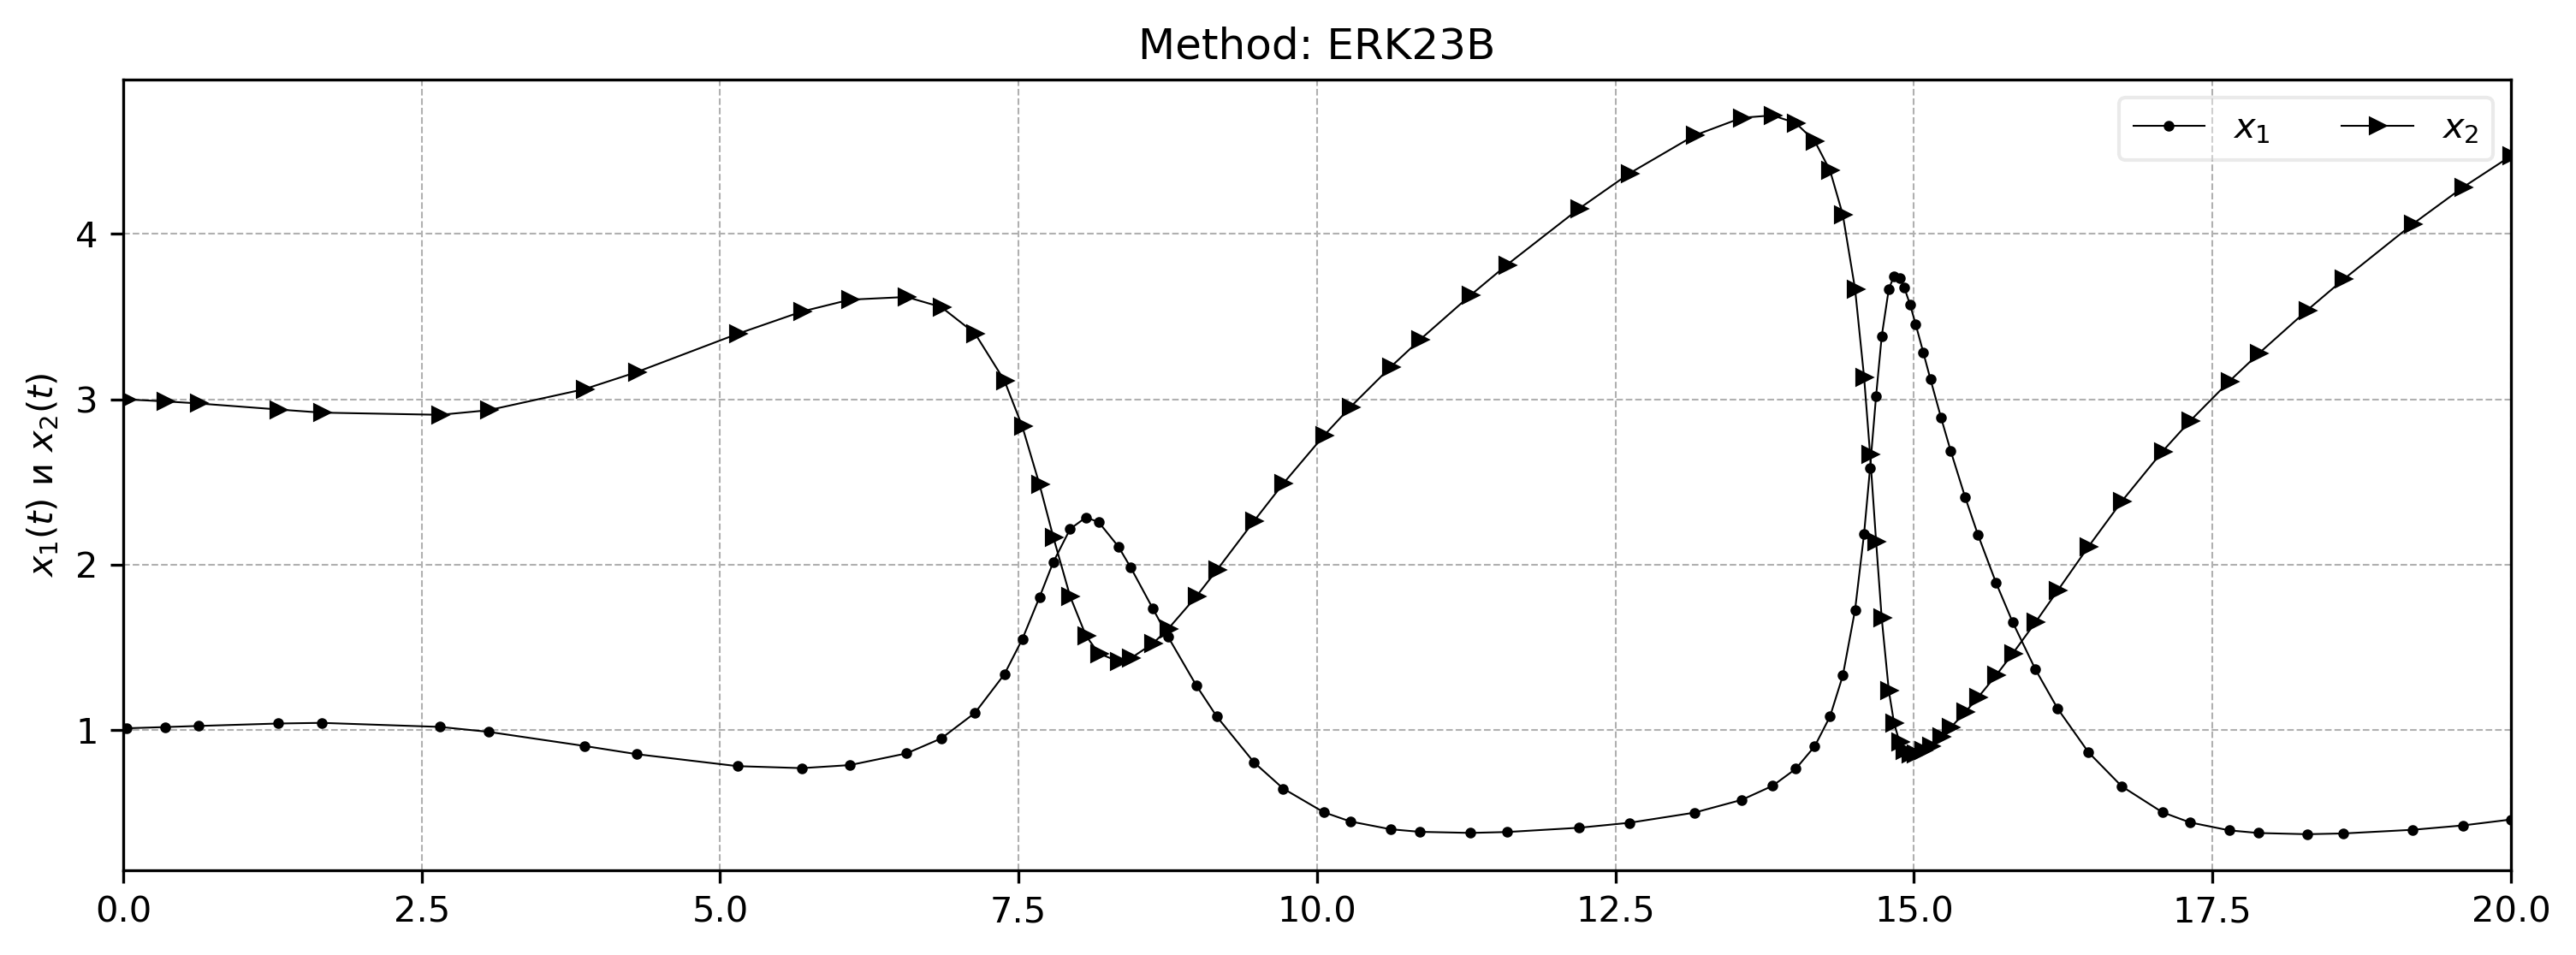

PyObject <matplotlib.legend.Legend object at 0x7f1b6af0f750>

In [9]:
fig01 = PyPlot.figure(1, dpi=300, figsize=(12.0, 4.0))

ax01 = fig01.add_subplot(1, 1, 1)
ax01.grid(b=true, ls="--", lw=0.5)

ax01.set_xlim(left=tn[1], right=tn[end])
ax01.set_xlim(left=tn[1], right=tn[end])

ax01.set_title("Method: ERK23B")
ax01.set_ylabel(L"$x_1(t)$ и $x_2(t)$")

ax01.plot(tn, xn[:,1], lw=0.5, marker="o", markersize=2, color="k", label=L"$x_1$")
ax01.plot(tn, xn[:,2], lw=0.5, marker=">", markersize=4, color="k", label=L"$x_2$")

ax01.legend(ncol=2, loc="best", framealpha=0.4)

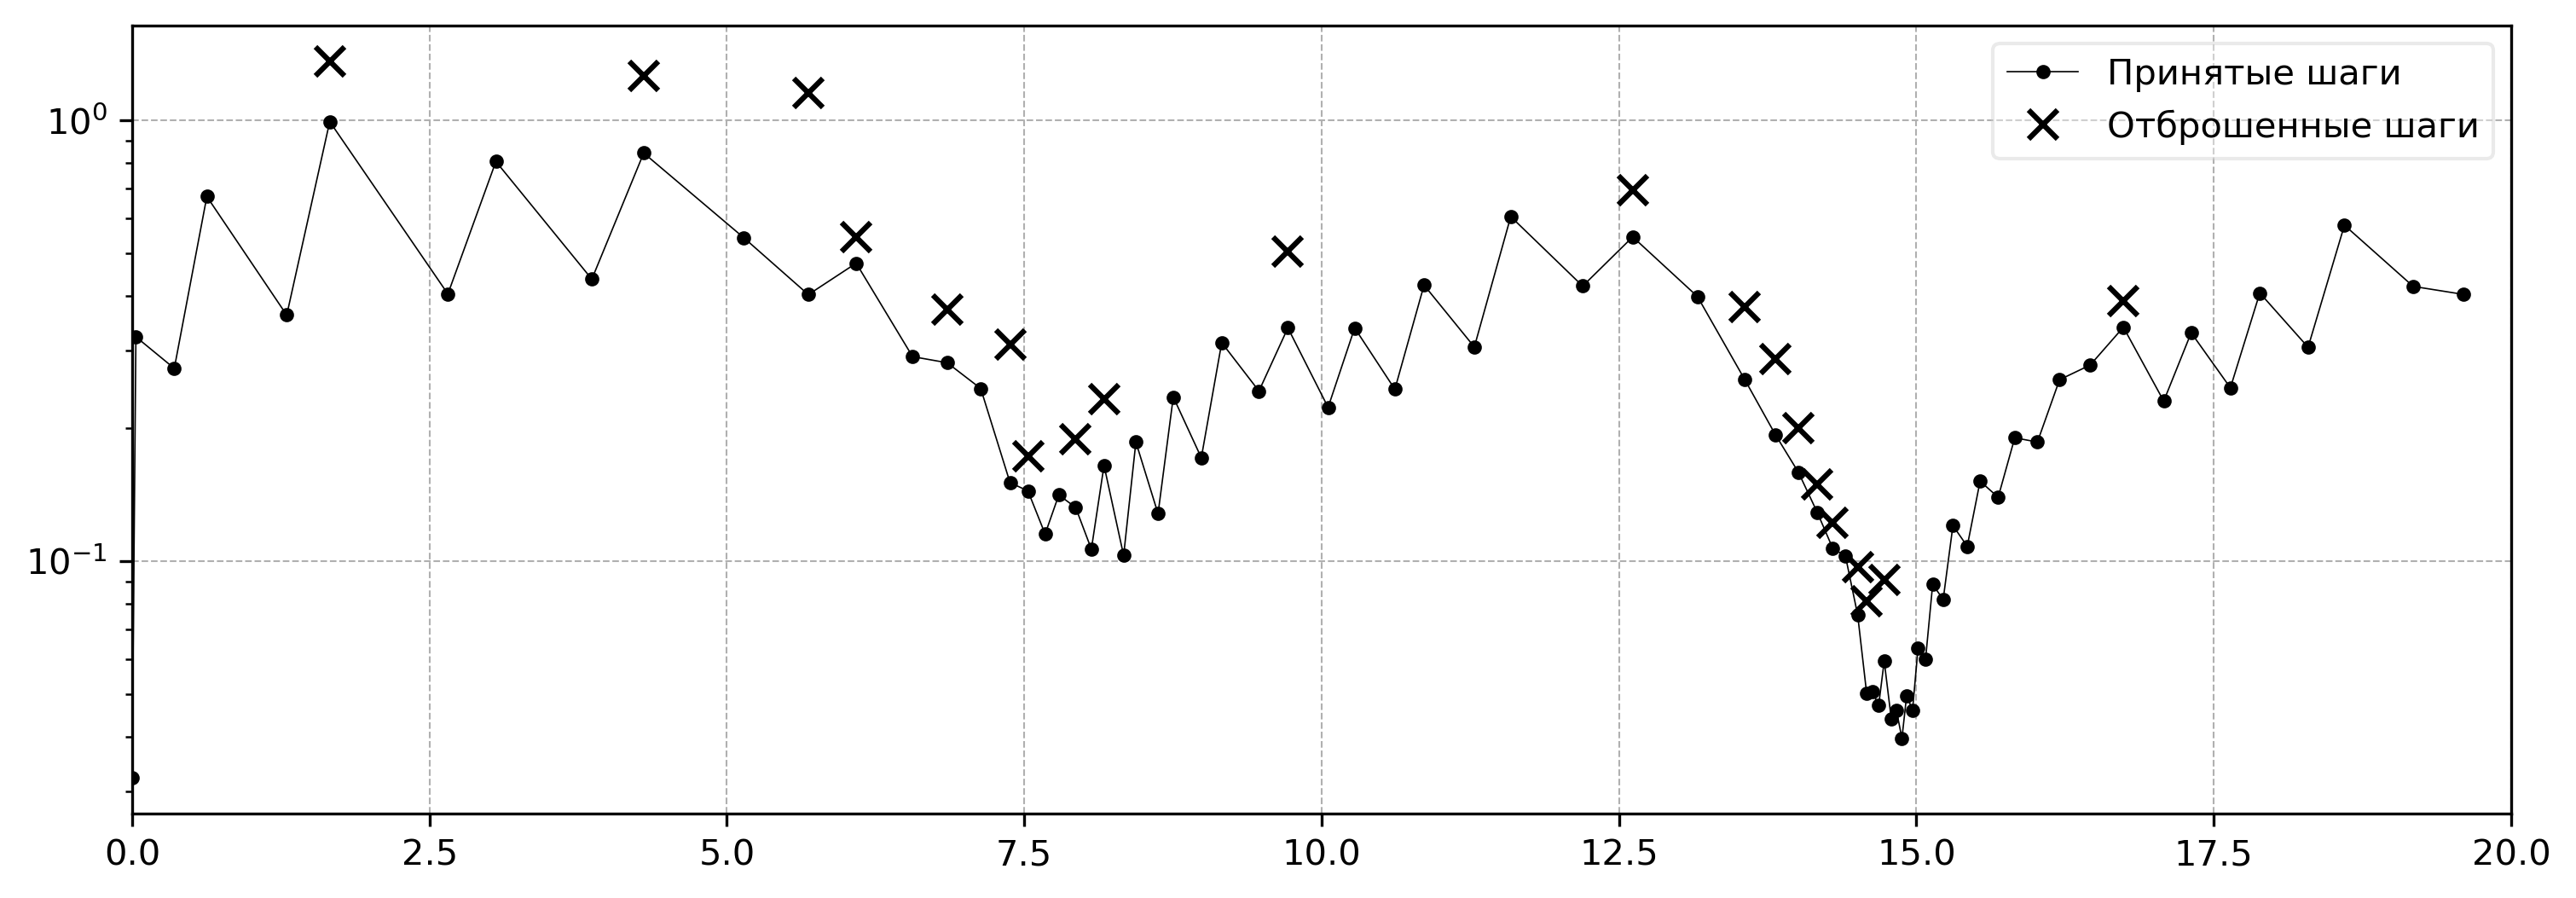

PyObject <matplotlib.legend.Legend object at 0x7f1b6a18ff50>

In [10]:
fig02 = PyPlot.figure(2, dpi=300, figsize=(12.0, 4.0))

ax02 = fig02.add_subplot(1, 1, 1)

ax02.grid(b=true, ls="--", lw=0.5)

ax02.set_xlim(left=tn[1], right=tn[end])

ax02.plot(accepted_t, accepted_h, lw=0.4, color="k", marker="o",
    markersize=3, label="Принятые шаги")
ax02.plot(rejected_t, rejected_h, linestyle="None", marker="x",
    markeredgecolor="black", markeredgewidth=1.5, markersize=8, label="Отброшенные шаги")

ax02.set_yscale("log")

ax02.legend(loc="best", framealpha=0.4)

## Применяем метод `ERK43B`

In [11]:
# Начальные данные для брусселятора из книги Хайрера 2го издания "ERK43B"
x_0 = [1.5, 3.0]
t_start = 0.0
t_stop = 20.0
A_tol = 1.0e-4
R_tol = 1.0e-4

0.0001

In [12]:
(accepted_t, accepted_h, 
    rejected_t, rejected_h) = ERK.ERK23B_info(brusselator, A_tol, R_tol, x_0, t_start, t_stop)

tn, xn = ERK.ERK23B(brusselator, A_tol, R_tol, x_0, t_start, t_stop)

([0.0, 0.008920160336682855, 0.0707123864131469, 0.11716373634962779, 0.22235587409133606, 0.29196650482123093, 0.44220245316746765, 0.5598006959350513, 0.7201655537133096, 0.8851621176491175  …  15.961776005884408, 16.223238935544856, 16.740248660135126, 17.07821693673569, 17.493596268708465, 17.867113607270706, 18.42456633054409, 18.95721038920315, 19.83821603986692, 20.0], [1.5 3.0; 1.5157570729100072 2.9797127895394153; … ; 0.47130496777126357 4.52180837471499; 0.4923438457052712 4.584654709816342])

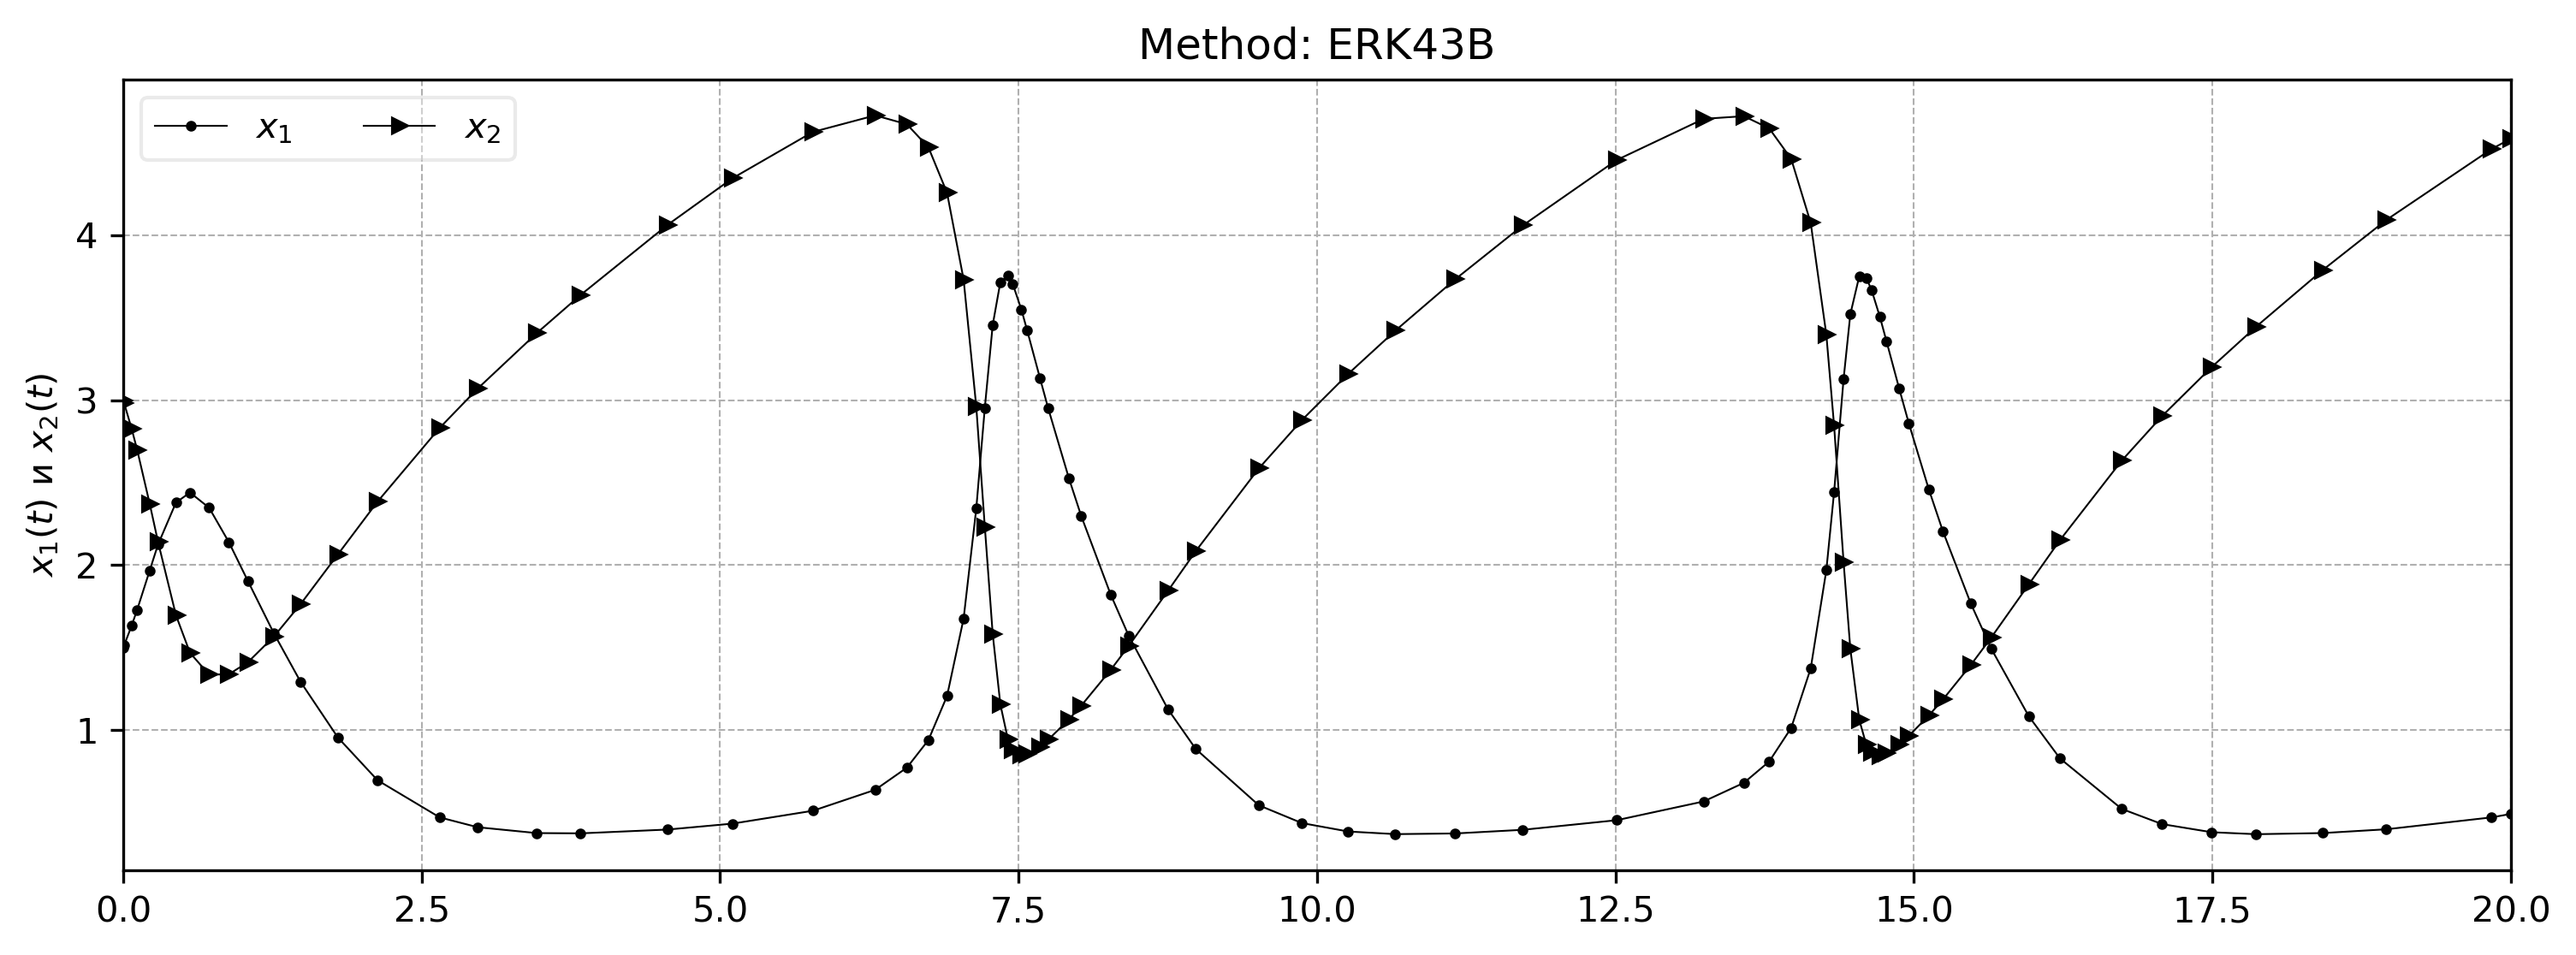

PyObject <matplotlib.legend.Legend object at 0x7f1b67231390>

In [13]:
fig03 = PyPlot.figure(3, dpi=300, figsize=(12.0, 4.0))

ax03 = fig03.add_subplot(1, 1, 1)

ax03.grid(b=true, ls="--", lw=0.5)

ax03.set_xlim(left=tn[1], right=tn[end])
ax03.set_xlim(left=tn[1], right=tn[end])

ax03.set_title("Method: ERK43B")
ax03.set_ylabel(L"$x_1(t)$ и $x_2(t)$")

ax03.plot(tn, xn[:,1], lw=0.5, marker="o", markersize=2, color="k", label=L"$x_1$")
ax03.plot(tn, xn[:,2], lw=0.5, marker=">", markersize=4, color="k", label=L"$x_2$")

ax03.legend(ncol=2, loc="best", framealpha=0.4)

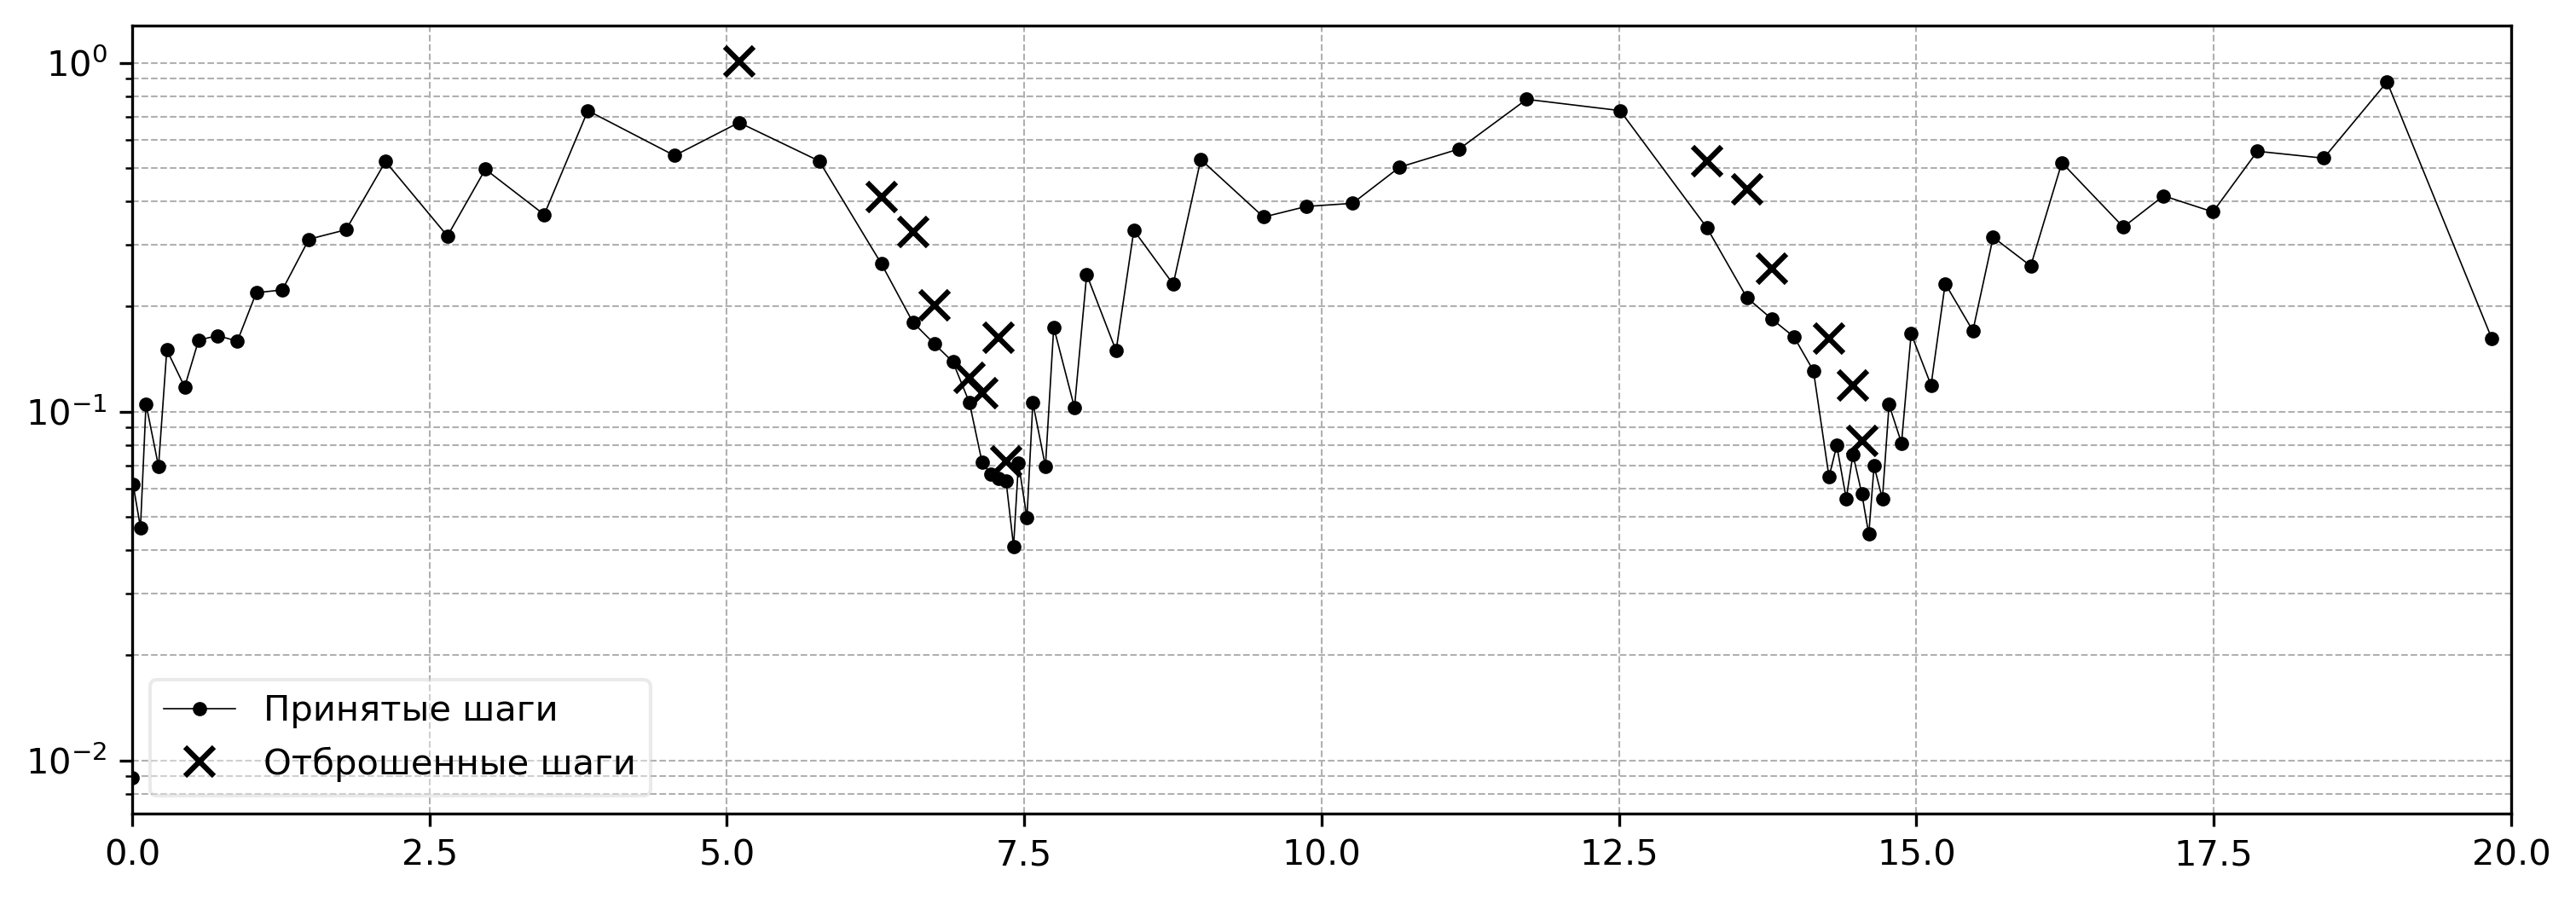

PyObject <matplotlib.legend.Legend object at 0x7f1b63720d10>

In [16]:
fig04 = PyPlot.figure(4, dpi=300, figsize=(12.0, 4.0))

ax04 = fig04.add_subplot(1, 1, 1)
ax04.grid(b=true, which="both", ls="--", lw=0.5)

ax04.set_xlim(left=tn[1], right=tn[end])

ax04.plot(accepted_t, accepted_h, lw=0.4, color="k", marker="o",
    markersize=3, label="Принятые шаги")
ax04.plot(rejected_t, rejected_h, linestyle="None", marker="x",
    markeredgecolor="black", markeredgewidth=1.5, markersize=8, label="Отброшенные шаги")

ax04.set_yscale("log")

ax04.legend(loc="best", framealpha=0.4)